In [40]:
from scipy import stats
import numpy as np
import math
import pandas as pd
import os

import plotly.express as px

# Задание 1

Читаем данные в датафрейм

In [42]:
df = pd.read_csv('../../Downloads/experiment_lesson_4.csv')

In [43]:
df.head(2)

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control


In [44]:
df['delivery_time'].describe()

count    20196.000000
mean        42.054169
std         10.382196
min         10.000000
25%         35.000000
50%         42.000000
75%         49.000000
max         83.000000
Name: delivery_time, dtype: float64

In [45]:
df[df['delivery_time'].isna()]

,order_id,delivery_time,district,experiment_group


## 1. Гистрограммы распределения времени контрольной и тестовой групп

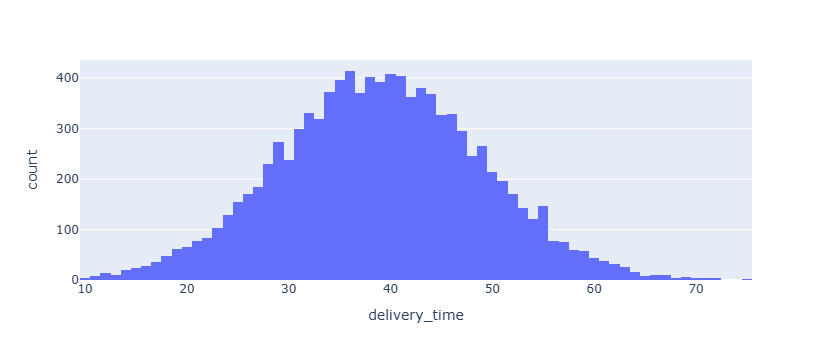

In [46]:
# тестовая группа
fig = px.histogram(df[df['experiment_group'] == 'test'], x="delivery_time")
fig.show()

In [47]:
# среднее значение времени в тестовой группе
df[df['experiment_group'] == 'test']['delivery_time'].mean()

39.04681314330958

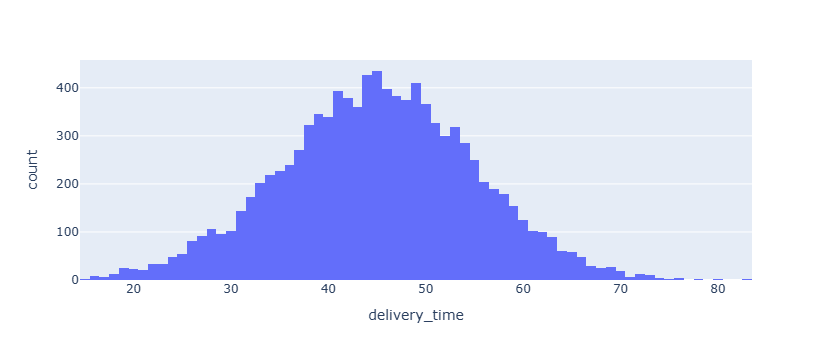

In [48]:
# контрольная группа
fig = px.histogram(df[df['experiment_group'] == 'control'], x="delivery_time")
fig.show()

In [49]:
# среднее значение времени в контрольной группе
df[df['experiment_group'] == 'control']['delivery_time'].mean()

45.065101070154576

## 2. Разница в количестве наблюдений контрольной и тестовой группы

In [14]:
df['experiment_group'].value_counts()

experiment_group
test       10104
control    10092
Name: count, dtype: int64

In [15]:
10104 - 10092

12

## 3. Проверка распределений на нормальность

In [50]:
stats.normaltest(df[df['experiment_group'] == 'control']['delivery_time'])
# в контрольной группе распределение соответствует нормальному
# pvalue больше уровня значимости 0.05

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [51]:
stats.normaltest(df[df['experiment_group'] == 'test']['delivery_time'])
# в тестовой группе распределение не соответствует нормальному
# pvalue меньше уровня значимости 0.05

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

## 4. Стандартное отклонение

In [52]:
# в контрольной группе
df[df['experiment_group'] == 'control']['delivery_time'].std()

9.990016960246372

In [53]:
# в тестовой группе
df[df['experiment_group'] == 'test']['delivery_time'].std()

9.883308351129061

## 5. Проверка Критерий Стьюдента

In [55]:
# t-test для двух независимых выборок
stats.ttest_ind(df[df['experiment_group'] == 'control']['delivery_time'], 
                df[df['experiment_group'] == 'test']['delivery_time'],
               equal_var = False)

TtestResult(statistic=43.035552024241454, pvalue=0.0, df=20191.127787584755)

## 6. Изменение времени доставки в процентах

In [39]:
(df[df['experiment_group'] == 'test'
    ]['delivery_time'].mean() - df[
    df['experiment_group'] == 'control'
    ]['delivery_time'].mean()) / df[
    df['experiment_group'] == 'test'
    ]['delivery_time'].mean() * 100

-15.413006702382301

# Задание 2

## Выводы в научном виде

 - При этом мы допустили, что обе выборки нормально распределены 
(хотя тест прошла только одна, для второй мы приняли, что данных достаточно много для выполнения условий ЦПТ)
 - Уровень значимости приняли стандартно 0.05, так как в задаче не было указано ограничение на это улсловие.
 - Стандартное отклонение обеих выборок разное, ttest_ind позволяет это учитывать

Среднее значение времени доставки уменьшилось на 15 % в тестовой группе относительно показателей контрольной группы, мы можем считать этот результат статистически значимым

## Выводы в человекочитаемом виде

1. Среднее время доставки в контрольной и тестовой группах статистически разное
2. В тестовой группе время доставки на 15 % меньше, чем в контрольной - время доставки уменьшилось (цель алгоритма)
3. Можем предположить, что время доставки изменилось за счет введения в работу алгоритма при отсутствии других внешних факторов (не забываем, что статистика не позволяет выявлять причинно-следственную связь)
4. На практике можем считать, что введение в работу новой фичи показало положительный результат, алгоритм нужно раскатить на все приложение.